<a href="https://colab.research.google.com/github/PashaIanko/Kaggle.RwandaCO2Emissions/blob/data_preparation_baseline/2_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
from google.colab import drive

# Datasets
import pandas as pd

# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Preprocessing & pipelines
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Data management
from sklearn.model_selection import train_test_split

# Other
import os

# Setup

In [104]:
# %%capture
GIT_DOWNLOAD_PATH = 'https://raw.githubusercontent.com/PashaIanko/Sklearn-Utils/main/'
FILES_LIST = [
    'path_manager.py',
    'sklearn_transformers.py',
    'sklearn_utils.py',
    'model.py'
]
GDRIVE_PATH = '/content/gdrive/MyDrive/'
PREPROC_TRIAL = 1
MODELS_TRIAL = 1
COMPETITION_PATH = GDRIVE_PATH + 'ML/Competitions/8.CO2Emissions/' # e.g. GDRIVE_PATH + 'ML/Competitions/8.CO2Emissions/'
# --------------------------------------------------
try:
    from nbpep8.nbpep8 import pep8
except ModuleNotFoundError:
    !pip install pycodestyle
    !pip install --index-url https://test.pypi.org/simple/ nbpep8
from nbpep8.nbpep8 import pep8
# ---------------------------------------
def download_files(url_dict):
    for file, url in url_dict.items():
        print(f'Downloading {file}')
        !wget -O {file} {url} {file}
url_dict = {file: GIT_DOWNLOAD_PATH + file for file in FILES_LIST}
print('a')
download_files(url_dict)
# ---------------------------------------
import importlib
import path_manager
import sklearn_utils
import sklearn_transformers
import model
def reload_all(modules_list_):
    for module in modules_list_:
        importlib.reload(module)
MODULES_LIST = [
    path_manager,
    sklearn_utils,
    sklearn_transformers,
    model
]
reload_all(MODULES_LIST)
# ---------------------------------------
from path_manager import PathManager
from model import Model
from sklearn_utils import nan_statistics
from sklearn_utils import boxplot_regression
from sklearn_utils import get_correlated_attributes
from sklearn_utils import visualize_datasets_distributions
from sklearn_transformers import ColumnDropper
from sklearn_transformers import LogTransformer
# ---------------------------------------
from google.colab import drive
drive.mount('/content/gdrive')
manager = PathManager(
    competition_path=COMPETITION_PATH,
    preprocessing_trial=PREPROC_TRIAL,
    models_trial=MODELS_TRIAL
)
manager.setup_paths()

a
--2023-09-29 11:14:46--  https://raw.githubusercontent.com/PashaIanko/Sklearn-Utils/main/path_manager.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3482 (3.4K) [text/plain]
Saving to: ‘path_manager.py’

path_manager.py     100%[===================>]   3.40K  --.-KB/s    in 0s      

2023-09-29 11:14:47 (49.5 MB/s) - ‘path_manager.py’ saved [3482/3482]

--2023-09-29 11:14:47--  http://path_manager.py/
Resolving path_manager.py (path_manager.py)... failed: Name or service not known.
wget: unable to resolve host address ‘path_manager.py’
FINISHED --2023-09-29 11:14:47--
Total wall clock time: 0.9s
Downloaded: 1 files, 3.4K in 0s (49.5 MB/s)
--2023-09-29 11:14:47--  https://raw.githubusercontent.com/PashaIanko/Sklearn-Utils/main/sklearn_transformers.py
Re

# Download the data

In [57]:
df_train = pd.read_csv(manager.train_path)

In [58]:
df_submission = pd.read_csv(manager.test_path)

In [59]:
assert len(df_train.columns) == len(df_submission.columns) + 1
assert set(df_train.columns) - set(df_submission.columns) == {'emission'}

# Split the data

- We split available, labeled training data into **trainval** and **test set**

In [60]:
TRAINVAL_PERCENT = 0.85
TRAIN_PERCENT = 0.8
RANDOM_STATE = 42
TARGET_COLUMN = 'emission'

df_trainval, df_test = train_test_split(
    df_train,
    train_size=TRAINVAL_PERCENT,
    random_state=RANDOM_STATE
)

df_train, df_val = train_test_split(
    df_trainval,
    train_size=TRAIN_PERCENT,
    random_state=RANDOM_STATE
)

df_train.shape, df_val.shape, df_test.shape

((53735, 76), (13434, 76), (11854, 76))

## Make sure train, validation and test are from the same distribution

# Not implemented, the code takes forever, big datasets

# Process the data

## Cleaning NAN columns

In [61]:
NAN_THRESHOLD = 18

res = nan_statistics(df_train)
nan_cols = [col for col in res.keys() if res[col] >= NAN_THRESHOLD]
nan_cols

Col -- Nan percentage
UvAerosolLayerHeight_aerosol_height 99.43612170838374
UvAerosolLayerHeight_aerosol_pressure 99.43612170838374
UvAerosolLayerHeight_aerosol_optical_depth 99.43612170838374
UvAerosolLayerHeight_sensor_zenith_angle 99.43612170838374
UvAerosolLayerHeight_sensor_azimuth_angle 99.43612170838374
UvAerosolLayerHeight_solar_azimuth_angle 99.43612170838374
UvAerosolLayerHeight_solar_zenith_angle 99.43612170838374
NitrogenDioxide_NO2_column_number_density 23.23997394621755
NitrogenDioxide_tropospheric_NO2_column_number_density 23.23997394621755
NitrogenDioxide_stratospheric_NO2_column_number_density 23.23997394621755
NitrogenDioxide_NO2_slant_column_number_density 23.23997394621755
NitrogenDioxide_tropopause_pressure 23.23997394621755
NitrogenDioxide_absorbing_aerosol_index 23.23997394621755
NitrogenDioxide_cloud_fraction 23.23997394621755
NitrogenDioxide_sensor_altitude 23.23997394621755
NitrogenDioxide_sensor_azimuth_angle 23.23997394621755
NitrogenDioxide_sensor_zenith_an

['SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'SulphurDioxide_solar_zenith_angle',
 'SulphurDioxide_SO2_column_number_density_15km',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDioxide_tropopause_pressure',
 'NitrogenDioxide_absorbing_aerosol_index',
 'NitrogenDioxide_cloud_fraction',
 'NitrogenDioxide_sensor_altitude',
 'NitrogenDioxide_sensor_azimuth_angle',
 'NitrogenDioxide_sensor_zenith_angle',
 'NitrogenDioxide_solar_azimuth_angle',
 'NitrogenDioxide_solar_zenith_angle',
 'UvAerosolLayerHeight_aerosol_height',
 'UvAerosolLayerHeight_aerosol_pressure',
 

In [62]:
def remove_cols(df, cols):
    return df.drop(columns=cols)

df_train = remove_cols(df_train, nan_cols)
df_val = remove_cols(df_val, nan_cols)
df_test = remove_cols(df_test, nan_cols)
df_submission = remove_cols(df_submission, nan_cols)

In [63]:
assert \
    set(df_train.columns) - set(df_submission) == {TARGET_COLUMN} and \
    set(df_train) == set(df_val) == set(df_test)

## Clean outliers in target feature (row-wise)

In [64]:
df_train['emission'].describe()

count    53735.000000
mean        81.751192
std        144.095447
min          0.000000
25%          9.688742
50%         45.482280
75%        109.397098
max       3167.768000
Name: emission, dtype: float64

0.057709128128780124
count    50634.000000
mean        60.645843
std         61.284971
min          0.000000
25%          7.936085
50%         40.785533
75%         97.942678
max        249.980670
Name: emission, dtype: float64


Text(0.5, 1.0, 'After outlier cleaning')

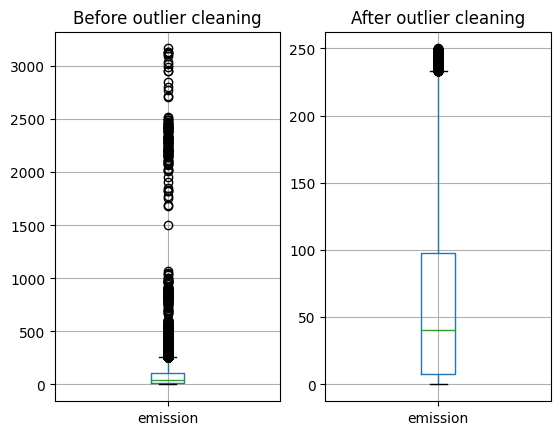

In [65]:
TARGET_OUTLIER_THRESHOLD = 250

print(
    df_train.loc[df_train[TARGET_COLUMN] >= TARGET_OUTLIER_THRESHOLD].shape[0] /
    df_train.shape[0]
)

print(
    df_train.loc[
        df_train[TARGET_COLUMN] < TARGET_OUTLIER_THRESHOLD
    ][TARGET_COLUMN].describe()
)

_, ax = plt.subplots(1, 2)
df_train[[TARGET_COLUMN]].boxplot(ax=ax[0])
df_train.loc[
    df_train[TARGET_COLUMN] < TARGET_OUTLIER_THRESHOLD,
    :
][[TARGET_COLUMN]].boxplot(ax=ax[1])

ax[0].set_title('Before outlier cleaning')
ax[1].set_title(f'After outlier cleaning')

In [66]:
def clean_outlier(df, val):
    print(f'Shape before: {df.shape}')
    df = df.loc[
        df[TARGET_COLUMN] <= val,
        :
    ]
    print(f'Shape after: {df.shape}')
    return df

df_train = clean_outlier(df_train, TARGET_OUTLIER_THRESHOLD)
df_val = clean_outlier(df_val, TARGET_OUTLIER_THRESHOLD)
df_test = clean_outlier(df_test, TARGET_OUTLIER_THRESHOLD)

# df_submission does not have TARGET_COLUMN

Shape before: (53735, 48)
Shape after: (50634, 48)
Shape before: (13434, 48)
Shape after: (12611, 48)
Shape before: (11854, 48)
Shape after: (11160, 48)


# Removing categorical columns

In [67]:
train_cat_col = df_train.dtypes.loc[df_train.dtypes == 'object']
val_cat_col = df_val.dtypes.loc[df_train.dtypes == 'object']
test_cat_col = df_test.dtypes.loc[df_test.dtypes == 'object']
submission_cat_col = df_submission.dtypes.loc[df_submission.dtypes == 'object']

assert (train_cat_col == val_cat_col).all() and (val_cat_col == test_cat_col).all() and \
    (train_cat_col == submission_cat_col).all() and train_cat_col.shape[0] == 1  # only 1 cat col
print(train_cat_col)

ID_LAT_LON_YEAR_WEEK    object
dtype: object


In [68]:
COL_TO_DROP = 'ID_LAT_LON_YEAR_WEEK'


params=dict(labels=[COL_TO_DROP], axis='columns', inplace=True, errors='ignore')
df_train.drop(**params)
df_val.drop(**params)
df_test.drop(**params)
df_submission.drop(**params)

for df in [df_train, df_val, df_test, df_submission]:
    assert not COL_TO_DROP in df.columns

# Feature engineering

## Season feature

In [73]:
print(sorted(df_train.week_no.unique())), len(df_train.week_no.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


(None, 53)

In [75]:
SEASON_COLUMN = 'season'

WEEK_TO_SEASON_DICT = {
    'winter': [0, 12],
    'spring': [13, 26],
    'summer': [27, 40],
    'autumn': [41, 53]
}

def calculate_season(item):
    for key, value in WEEK_TO_SEASON_DICT.items():
        if value[0] <= item <= value[1]:
            return key
    raise Exception  # unexpected key

def add_season_feature(df):
    df[SEASON_COLUMN] = df['week_no'].map(
        lambda item: calculate_season(item),
        # axis='rows'
    )
    return df

df_train = add_season_feature(df_train)
df_val = add_season_feature(df_val)
df_test = add_season_feature(df_test)
df_submission = add_season_feature(df_submission)


for df in [df_train, df_val, df_test, df_submission]:
    assert SEASON_COLUMN in df.columns

In [76]:
df_train.loc[:5, ['season', 'week_no']]

,season,week_no
40910,autumn,47
30837,autumn,44
4495,autumn,43
58009,summer,27
70372,autumn,41
...,...,...
16528,autumn,45
40313,summer,33
7283,spring,22
30246,summer,36


## Binning for latitude and longitude

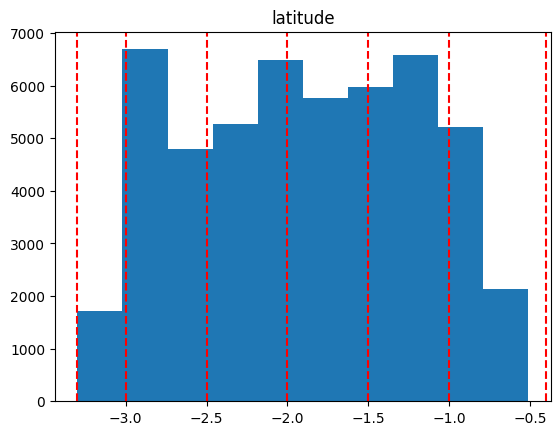

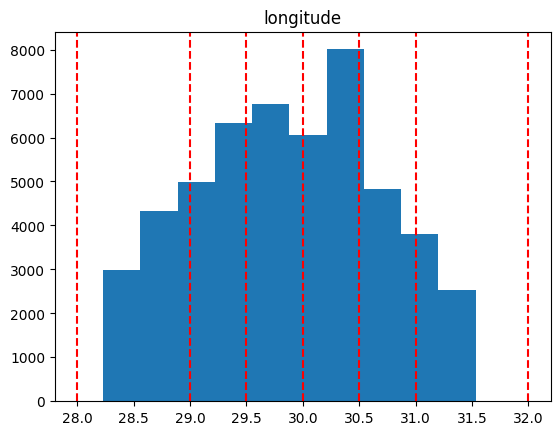

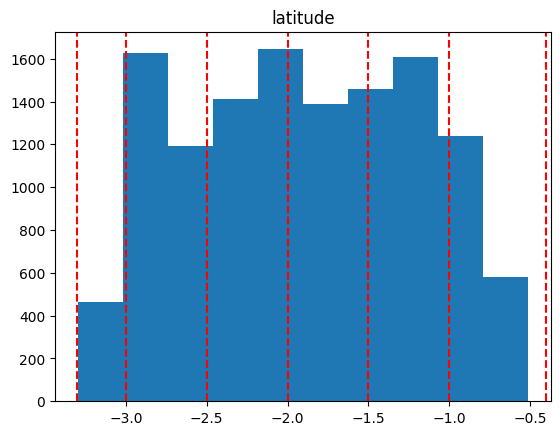

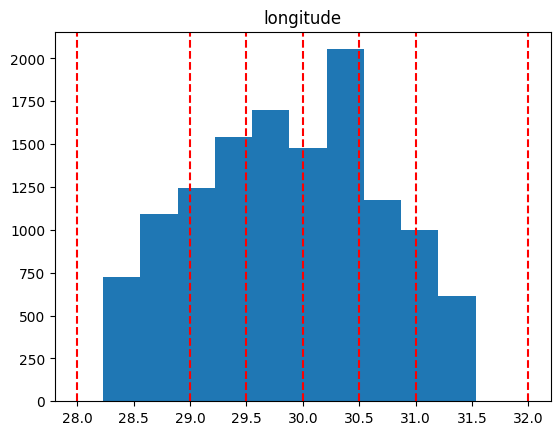

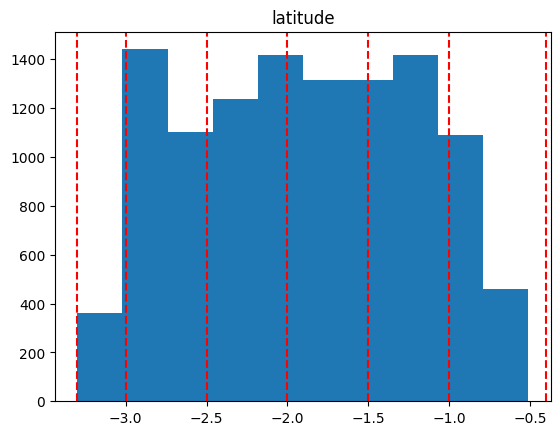

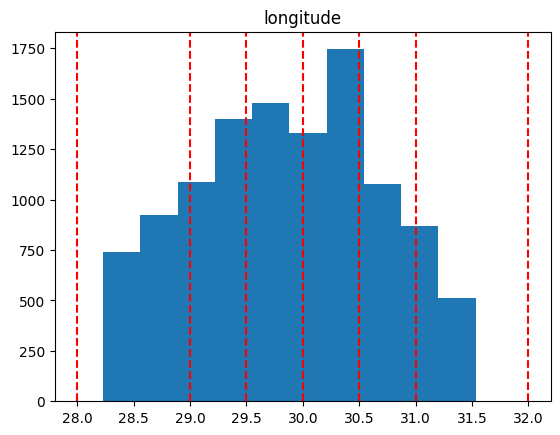

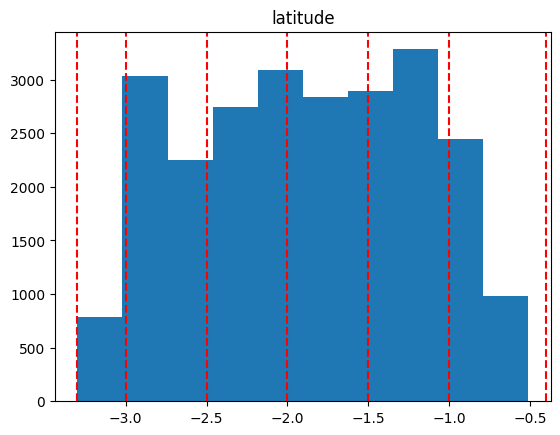

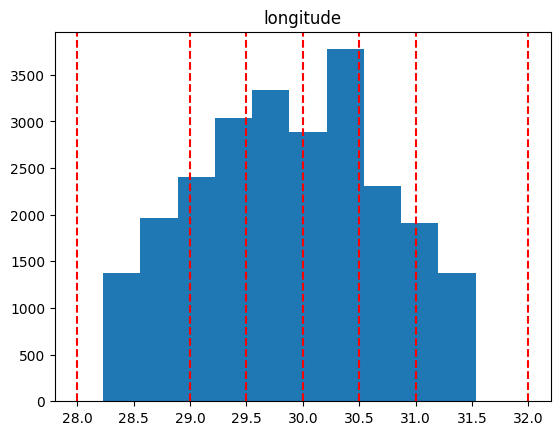

In [169]:
from sklearn_utils import bin_column


for df in [df_train, df_val, df_test, df_submission]:
    assert df['latitude'].isna().sum() == 0 and \
        df['longitude'].isna().sum() == 0

LATITUDE_BINS = [-3.3, -3.0, -2.5, -2.0, -1.5, -1.0, -0.4]
LONGITUDE_BINS =  [28, 29.0, 29.5, 30, 30.5, 31, 32]


for df in [df_train, df_val, df_test, df_submission]:
    bin_column(df, 'latitude', LATITUDE_BINS)
    bin_column(df, 'longitude', LONGITUDE_BINS)


for df in [df_train, df_val, df_test, df_submission]:
    assert df['latitude'].isna().sum() == 0 and \
        df['longitude'].isna().sum() == 0 and \
        df['latitude_binned'].isna().sum() == 0 and \
        df['longitude_binned'].isna().sum() == 0

## Feature cross for latitude and longitude

In [171]:
for df in [df_train, df_val, df_test, df_submission]:
    df['coordinate_zone'] = df.apply(
        lambda item: f'{item["latitude_binned"]}x{item["longitude_binned"]}',
        axis=1
    )

assert set(df_train['coordinate_zone'].unique()) == set(df_val['coordinate_zone'].unique()) and \
    set(df_train['coordinate_zone'].unique()) == set(df_test['coordinate_zone'].unique()) and \
    set(df_train['coordinate_zone'].unique()) == set(df_submission['coordinate_zone'].unique())

In [174]:
df_train.iloc[:5, :].loc[:, ['latitude_binned', 'longitude_binned', 'coordinate_zone']]

,latitude_binned,longitude_binned,coordinate_zone
40910,3,2,3x2
30837,3,3,3x3
4495,5,4,5x4
58009,2,0,2x0
70372,1,3,1x3


In [186]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(df_train[['coordinate_zone']])
encoder.categories_[0]

array(['0x0', '0x1', '0x2', '0x3', '0x4', '1x0', '1x1', '1x2', '1x3',
       '1x4', '2x0', '2x1', '2x2', '2x3', '2x4', '2x5', '3x0', '3x1',
       '3x2', '3x3', '3x4', '3x5', '4x0', '4x1', '4x2', '4x3', '4x4',
       '4x5', '5x0', '5x1', '5x2', '5x3', '5x4', '5x5'], dtype=object)

In [195]:
def do_feature_cross(df, one_hot_encoder, column):
    transformation = one_hot_encoder.transform(df[[column]])
    temp_df = pd.DataFrame(transformation.toarray())
    print(f'After transformation {temp_df.isna().sum().sum()} nans')

    print(f'Before join: {df.isna().sum().sum()} nans')
    temp_df.set_index(df.index)
    print(f'After join: {df.isna().sum().sum()} nans\n')
    return df.join(temp_df)


df_train = do_feature_cross(df_train, encoder, 'coordinate_zone')
df_val = do_feature_cross(df_val, encoder, 'coordinate_zone')
df_test = do_feature_cross(df_test, encoder, 'coordinate_zone')
df_submission = do_feature_cross(df_submission, encoder, 'coordinate_zone')

After transformation 0 nans
Before join: 14061 nans
After join: 14061 nans
After transformation 0 nans
Before join: 12153 nans
After join: 12153 nans
After transformation 0 nans
Before join: 41871 nans
After join: 41871 nans


# Data processing pipeline

# Save the data

In [ ]:
manager.save_to_csv(
    df_train,
    manager.data_trial_path,
    'train_processed.csv'
)

In [ ]:
manager.save_to_csv(
    df_val,
    manager.data_trial_path,
    'val_processed.csv'
)

In [ ]:
manager.save_to_csv(
    df_test,
    manager.data_trial_path,
    'test_processed.csv'
)

In [ ]:
manager.save_to_csv(
    df_submission,
    manager.data_trial_path,
    'submission_processed.csv'
)